<a href="https://colab.research.google.com/github/MRobinson112/Assignment_9/blob/main/assignment_10_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**

In [3]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [4]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()

**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [5]:

from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create feature DataFrame with names as column headings
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first 5 rows of new dataframe
print(df_iris.head())

# Create a taret names list
target_names = list(iris.target_names)

# Print the target names
print(target_names)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the kNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# create new observation prediction
new_observations = [[4.1, 3.0, 1.7, 1.2], [5.7, 3.0, 6.2, 2.3], [7.9, 1.0, 5.2, 2.5]]

# catagory prediction for the new observations
predicted_categories = knn.predict(new_observations)

# predictions from numerical back to category names
predicted_category_names = iris.target_names[predicted_categories]

print(predicted_category_names)


['setosa' 'virginica' 'virginica']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [7]:
from sklearn.metrics import accuracy_score

def knn_iris_accuracy(split, neighbors):
    # Load the iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # dataset split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

    # Create and train the kNN model
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    # test observations prediction for the categories
    y_pred = knn.predict(X_test)

    # Calculate and return the accuracy score
    return accuracy_score(y_test, y_pred)

accuracy = knn_iris_accuracy(0.2, 5)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

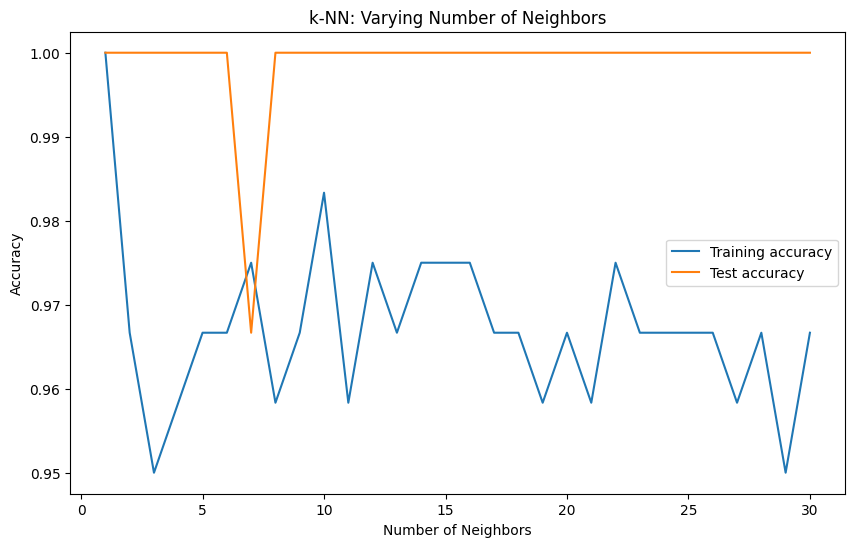

In [8]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Arrays to store scores
neighbors = range(1, 31)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# K values loop
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # check accuracy on training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # check accuracy on testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#  plots
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Test accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN: Varying Number of Neighbors')
plt.show()
